# Application for TSAS

This document has been published for reproducing the application presented in a conference paper dedicated to AeroMAPS, focuding on the reproduction of ICAO LTAG scenarios. The different assumptions of this prospective scenario are given in the following. 

> **⚠ This notebook has been developed with the AeroMAPS version v0.7.1-beta for obtaining the paper results. However, this notebook has been or could be modified in order to be executable with the latest versions of AeroMAPS, which sometimes leads to different results compared to the ones from the paper, due to some models' modifications. In order to retrieve the results of the paper, one can use the v0.7.1-beta version associated with the original notebook.**

## Load

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from aeromaps import create_process
from aeromaps.utils.functions import create_partitioning
import gc

## Partitioning for international aviation

In [2]:
create_partitioning(
    file="data/partitioned_data/aeroscope_international_data.csv", path="data/partitioned_data"
)

## Process, data and compute

In [3]:
process_is0high = create_process(
    configuration_file="data/config_files/config_is0high.yaml"
)
process_is0low = create_process(
    configuration_file="data/config_files/config_is0low.yaml"
)
process_is0medium = create_process(
    configuration_file="data/config_files/config_is0medium.yaml"
)
process_is1high = create_process(
    configuration_file="data/config_files/config_is1high.yaml"
)
process_is1low = create_process(
    configuration_file="data/config_files/config_is1low.yaml"
)
process_is1medium = create_process(
    configuration_file="data/config_files/config_is1medium.yaml"
)
process_is2high = create_process(
    configuration_file="data/config_files/config_is2high.yaml"
)
process_is2low = create_process(
    configuration_file="data/config_files/config_is2low.yaml"
)
process_is2medium = create_process(
    configuration_file="data/config_files/config_is2medium.yaml"
)
process_is3high = create_process(
    configuration_file="data/config_files/config_is3high.yaml"
)
process_is3low = create_process(
    configuration_file="data/config_files/config_is3low.yaml"
)
process_is3medium = create_process(
    configuration_file="data/config_files/config_is3medium.yaml"
)

⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: Using Top-Do

In [4]:
# # IS0 scenarios
process_is0high.compute()
process_is0high_data = process_is0high.data
process_is0high.write_json()
del process_is0high
gc.collect()

process_is0low.compute()
process_is0low_data = process_is0low.data
process_is0low.write_json()
del process_is0low
gc.collect()

process_is0medium.compute()
process_is0medium_data = process_is0medium.data
process_is0medium.write_json()
del process_is0medium
gc.collect()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: grid_electricity_co2_emission_factor Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant 

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: grid_electricity_co2_emission_factor Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant 

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: grid_electricity_co2_emission_factor Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant 

78898

In [5]:
# IS1 scenarios
process_is1high.compute()
process_is1high_data = process_is1high.data
process_is1high.write_json()
del process_is1high
gc.collect()

process_is1low.compute()
process_is1low_data = process_is1low.data
process_is1low.write_json()
del process_is1low
gc.collect()

process_is1medium.compute()
process_is1medium_data = process_is1medium.data
process_is1medium.write_json()
del process_is1medium
gc.collect()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2048, 2049, 2050, 2051]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021, 2022]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2047, 2048, 2050, 2052]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2047, 2050, 2051, 2053]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


102431

In [6]:
# IS2 scenarios
process_is2high.compute()
process_is2high_data = process_is2high.data
process_is2high.write_json()
del process_is2high
gc.collect()

process_is2low.compute()
process_is2low_data = process_is2low.data
process_is2low.write_json()
del process_is2low
gc.collect()

process_is2medium.compute()
process_is2medium_data = process_is2medium.data
process_is2medium.write_json()
del process_is2medium
gc.collect()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as 

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as 

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as 

103269

In [7]:
# IS3 scenarios
process_is3high.compute()
process_is3high_data = process_is3high.data
process_is3high.write_json()
del process_is3high
gc.collect()

process_is3low.compute()
process_is3low_data = process_is3low.data
process_is3low.write_json()
del process_is3low
gc.collect()

process_is3medium.compute()
process_is3medium_data = process_is3medium.data
process_is3medium.write_json()
### Not del this one as used afterwards
# del process_is3medium
# gc.collect()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'generic_biofuel' share was adjusted in the following years:
   - 2063: 46.5 % instead of 46.5 %
   - 2065: 47.1 % instead of 47.1 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'electrofuel' share was adjusted in the following years:
   - 2063: 53.5 % instead of 53.5 %
   - 2065: 52.9 % instead of 52.9 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_ke

⚠️ Warning: excess generic_biofuel production in years: [2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'generic_biofuel' share was adjusted in the following years:
   - 2049: 33.0 % instead of 33.0 %
   - 2058: 17.6 % instead of 17.6 %
   - 2064: 14.6 % instead of 14.6 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'electrofuel' share was adjusted in the following years:
   - 2049: 67.0 % instead of 67.0 %
   - 2058: 82.4 % instead of 82.4 %
   - 2064: 85.4 % instead of 85.4 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models

⚠️ Warning: excess generic_biofuel production in years: [2021, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'generic_biofuel' share was adjusted in the following years:
   - 2070: 36.2 % instead of 36.2 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\impacts\generic_energy_model\common\energy_use_choice.py:302: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'electrofuel' share was adjusted in the following years:
   - 2070: 63.8 % instead of 63.8 %

  warnings.warn(msg)
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first refe

⚠️ Warning: excess generic_biofuel production in years: [2021, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062]. Scaling down.


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


## Results

In [8]:
process = process_is3medium

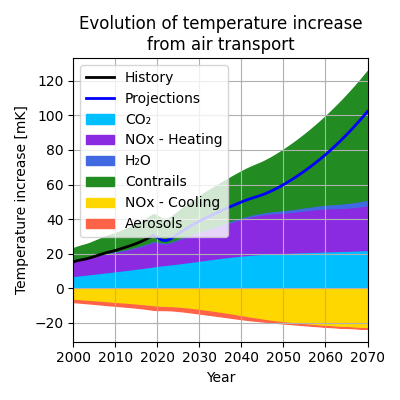

In [9]:
process.plot("detailed_temperature_increase_from_air_transport")

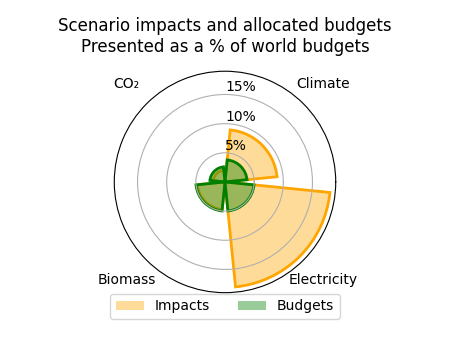

In [10]:
process.plot("multidisciplinary_assessment")

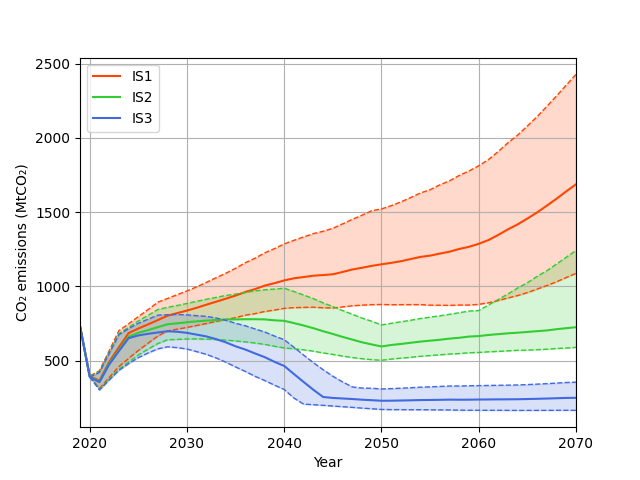

In [11]:
data_years = np.array((range(2019, 2071)))

fig, ax = plt.subplots()

ax.plot(
    data_years,
    process_is1low_data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is1medium_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="-",
    label="IS1",
)
ax.plot(
    data_years,
    process_is1high_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is1high_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is1low_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="orangered",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is2low_data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is2medium_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="-",
    label="IS2",
)
ax.plot(
    data_years,
    process_is2high_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is2high_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is2low_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="limegreen",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is3low_data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is3medium_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="-",
    label="IS3",
)
ax.plot(
    data_years,
    process_is3high_data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is3high_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is3low_data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="royalblue",
    alpha=0.2,
)

ax.set(
    xlabel="Year",
    ylabel="CO₂ emissions (MtCO₂)",
)
ax.grid()
plt.xlim(2019, 2070)
plt.legend()
plt.show()

## Climate

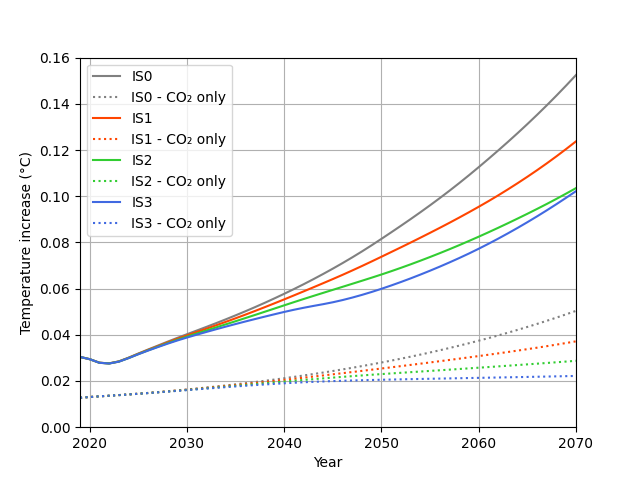

In [12]:
data_years = np.array((range(2019, 2071)))

fig, ax = plt.subplots()

ax.plot(
    data_years,
    process_is0medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="grey",
    linestyle="-",
    label="IS0",
)

ax.plot(
    data_years,
    process_is0medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1],
    color="grey",
    linestyle=":",
    label="IS0 - CO₂ only",
)

ax.plot(
    data_years,
    process_is1medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="-",
    label="IS1",
)

ax.plot(
    data_years,
    process_is1medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1],
    color="orangered",
    linestyle=":",
    label="IS1 - CO₂ only",
)

ax.plot(
    data_years,
    process_is2medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="-",
    label="IS2",
)

ax.plot(
    data_years,
    process_is2medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1],
    color="limegreen",
    linestyle=":",
    label="IS2 - CO₂ only",
)

ax.plot(
    data_years,
    process_is3medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="-",
    label="IS3",
)

ax.plot(
    data_years,
    process_is3medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1],
    color="royalblue",
    linestyle=":",
    label="IS3 - CO₂ only",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature increase (°C)",
)
ax.grid()
plt.xlim(2019, 2070)
plt.ylim(0, 0.16)
plt.legend()
plt.show()

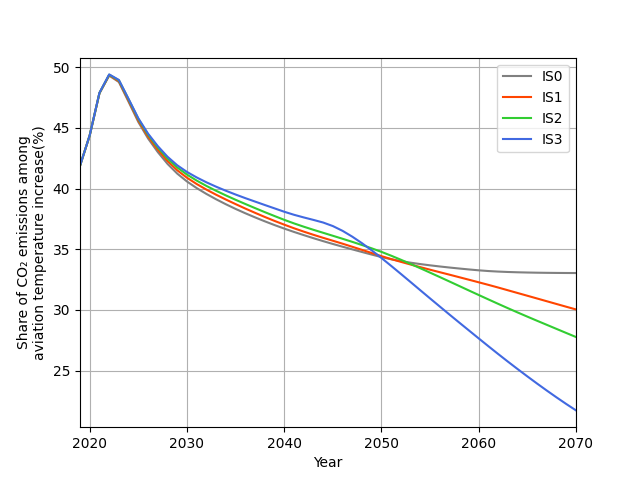

In [13]:
data_years = np.array((range(2019, 2071)))

fig, ax = plt.subplots()

ax.plot(
    data_years,
    process_is0medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1]
    / process_is0medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ]
    * 100,
    color="grey",
    linestyle="-",
    label="IS0",
)

ax.plot(
    data_years,
    process_is1medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1]
    / process_is1medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ]
    * 100,
    color="orangered",
    linestyle="-",
    label="IS1",
)

ax.plot(
    data_years,
    process_is2medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1]
    / process_is2medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ]
    * 100,
    color="limegreen",
    linestyle="-",
    label="IS2",
)


ax.plot(
    data_years,
    process_is3medium_data["climate_outputs"][
        ["temperature_increase_from_co2_from_aviation"]
    ].values[2019 - 1940 : 2070 - 1940 + 1]
    / process_is3medium_data["climate_outputs"][["temperature_increase_from_aviation"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ]
    * 100,
    color="royalblue",
    linestyle="-",
    label="IS3",
)


ax.set(
    xlabel="Year",
    ylabel="Share of CO₂ emissions among\naviation temperature increase(%)",
)
ax.grid()
plt.xlim(2019, 2070)
plt.legend()
plt.show()

## Cost comparison 

### a)  
First, cumulative cost saving thanks to efficiency (technology and operational) measures is compared between ICAO reference and AeroMAPS simulation.  
Dollars are converted into euros using a 1.1 arbitrary exchange rate, representative of 2020 values.   

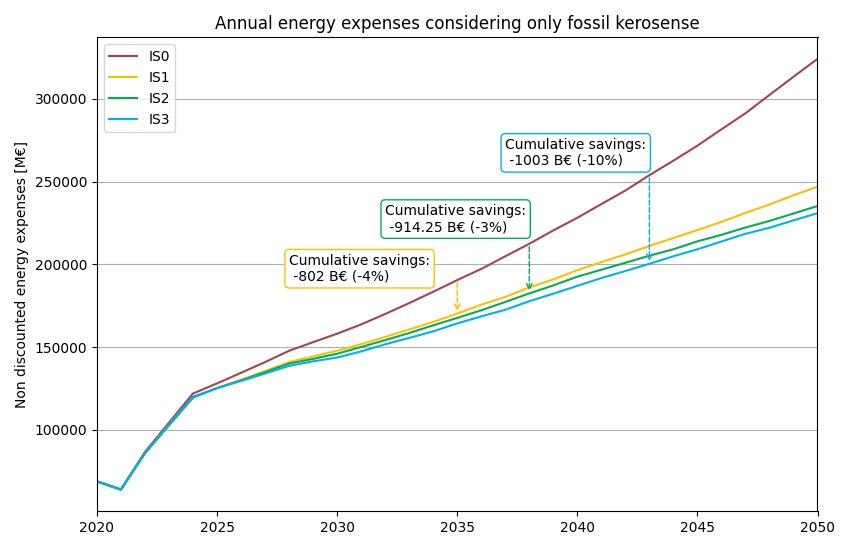

In [14]:
fig_eff, ax = plt.subplots(figsize=(8.5, 5.5))

data_years = np.array((range(2019, 2051)))

ax.plot(
    data_years,
    process_is0medium_data["vector_outputs"].loc[
        data_years, "non_discounted_full_kero_energy_expenses"
    ],
    label="IS0",
    linestyle="-",
    color="#A64253",
)

cumul_is0 = (
    process_is0medium_data["vector_outputs"]
    .loc[data_years, "non_discounted_full_kero_energy_expenses"]
    .sum()
)


ax.plot(
    data_years,
    process_is1medium_data["vector_outputs"].loc[
        data_years, "non_discounted_full_kero_energy_expenses"
    ],
    label="IS1",
    linestyle="-",
    color="#FEBF02",
)

is1_save = (
    cumul_is0
    - process_is1medium_data["vector_outputs"]
    .loc[data_years, "non_discounted_full_kero_energy_expenses"]
    .sum()
)


ax.plot(
    data_years,
    process_is2medium_data["vector_outputs"].loc[
        data_years, "non_discounted_full_kero_energy_expenses"
    ],
    label="IS2",
    linestyle="-",
    color="#05AD52",
)

is2_save = (
    cumul_is0
    - process_is2medium_data["vector_outputs"]
    .loc[data_years, "non_discounted_full_kero_energy_expenses"]
    .sum()
)

ax.plot(
    data_years,
    process_is3medium_data["vector_outputs"].loc[
        data_years, "non_discounted_full_kero_energy_expenses"
    ],
    label="IS3",
    linestyle="-",
    color="#04AFF0",
)

is3_save = (
    cumul_is0
    - process_is3medium_data["vector_outputs"]
    .loc[data_years, "non_discounted_full_kero_energy_expenses"]
    .sum()
)


# Adding textboxes and arrows


ax.annotate(
    f"Cumulative savings:\n {-is1_save/1000:.0f} B€ ({(is1_save/1000-836)/836*100:.0f}%)",
    xytext=(2028, 1.9e5),
    xy=(2028, 1.9e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#FEBF02", facecolor="white"),
)

ax.annotate(
    "",
    xy=(
        2035,
        process_is1medium_data["vector_outputs"].loc[
            2035, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    xytext=(
        2035,
        process_is0medium_data["vector_outputs"].loc[
            2035, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    arrowprops=dict(arrowstyle="->", color="#FEBF02", lw=1, ls="--"),
)


ax.annotate(
    f"Cumulative savings:\n {-is2_save/1000:.2f} B€ ({(is2_save/1000-945)/945*100:.0f}%)",
    xytext=(2032, 2.2e5),
    xy=(2032, 2.2e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#05AD52", facecolor="white"),
)

ax.annotate(
    "",
    xy=(
        2038,
        process_is2medium_data["vector_outputs"].loc[
            2038, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    xytext=(
        2038,
        process_is0medium_data["vector_outputs"].loc[
            2038, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    arrowprops=dict(arrowstyle="->", color="#05AD52", lw=1, ls="--"),
)


ax.annotate(
    f"Cumulative savings:\n {-is3_save/1000:.0f} B€ ({(is3_save/1000-1118)/1118*100:.0f}%)",
    xytext=(2037, 2.6e5),
    xy=(2037, 2.6e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#04AFF0", facecolor="white"),
)

ax.annotate(
    "",
    xy=(
        2043,
        process_is3medium_data["vector_outputs"].loc[
            2043, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    xytext=(
        2043,
        process_is0medium_data["vector_outputs"].loc[
            2043, "non_discounted_full_kero_energy_expenses"
        ],
    ),
    arrowprops=dict(arrowstyle="->", color="#04AFF0", lw=1, ls="--"),
)


ax.grid(axis="y")
ax.legend(loc="upper left")
ax.set_title("Annual energy expenses considering only fossil kerosense")
ax.set_ylabel("Non discounted energy expenses [M€]")
ax.set_xlim(2020, 2050)

fig_eff.canvas.header_visible = False
fig_eff.canvas.toolbar_position = "bottom"
fig_eff.tight_layout()

plt.tight_layout()
plt.savefig("cumul_saving_eff.pdf")

### b)
Second, The MFSP of the various illustrative fuels is comapred between our simulation and ICAO values.  
The simulation was callibrated using ICAO CAPEX values but keeping defaut AeroMAPS values for other parameters (efficiency, energy market prices).

In [15]:
is1_bio = [
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
]
is2_bio = [
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
]
is3_bio = [
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.1,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
    1.2,
]

# Conversion to euro per MJ (LHV 34.4 MJ/L)

is1_bio = [el / 1.1 / 34.4 for el in is1_bio]
is2_bio = [el / 1.1 / 34.4 for el in is2_bio]
is3_bio = [el / 1.1 / 34.4 for el in is3_bio]


# CO2
is1_efuel = [
    3.8,
    3.7,
    3.6,
    3.5,
    3.4,
    3.3,
    3.2,
    3.1,
    3.0,
    2.9,
    2.8,
    2.8,
    2.7,
    2.7,
    2.6,
    2.6,
    2.5,
    2.5,
    2.4,
    2.3,
    2.3,
    2.3,
    2.2,
    2.2,
    2.2,
    2.2,
    2.1,
    2.1,
    2.1,
    2.1,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
    2.0,
]
is2_efuel = [
    3.3,
    3.2,
    3.1,
    3.0,
    2.9,
    2.8,
    2.7,
    2.5,
    2.4,
    2.3,
    2.2,
    2.2,
    2.1,
    2.1,
    2.1,
    2.0,
    2.0,
    2.0,
    1.9,
    1.9,
    1.9,
    1.8,
    1.8,
    1.8,
    1.7,
    1.7,
    1.7,
    1.7,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
    1.6,
]
is3_efuel = [
    3.001999414,
    2.960066128,
    2.842790711,
    2.725515294,
    2.608239877,
    2.49096446,
    2.373689043,
    2.256413626,
    2.139138209,
    2.021862792,
    1.904587375,
    1.892056394,
    1.875215191,
    1.855691712,
    1.834385755,
    1.811835134,
    1.788381071,
    1.764250508,
    1.739600247,
    1.714542109,
    1.68915798,
    1.655505106,
    1.624365894,
    1.594808286,
    1.566310342,
    1.538557021,
    1.511346903,
    1.484545207,
    1.458058334,
    1.431819258,
    1.405778715,
    1.411452667,
    1.41685182,
    1.421995664,
    1.426901891,
    1.431586594,
    1.436064445,
    1.440348848,
    1.444452074,
    1.448385378,
    1.452159099,
    1.460294746,
    1.468460938,
    1.476657848,
    1.484885649,
    1.493144517,
    1.501434627,
    1.509756157,
    1.518109287,
    1.526494196,
    1.534911067,
]

is1_efuel = [el / 1.1 / 34.4 for el in is1_efuel]
is2_efuel = [el / 1.1 / 34.4 for el in is2_efuel]
is3_efuel = [el / 1.1 / 34.4 for el in is3_efuel]

# LH2

is3_lh2 = [
    6.9,
    6.6,
    6.3,
    6.0,
    5.7,
    5.4,
    5.1,
    4.8,
    4.5,
    4.2,
    4.0,
    3.9,
    3.8,
    3.7,
    3.6,
    3.5,
    3.5,
    3.4,
    3.3,
    3.2,
    3.1,
    3.0,
    3.0,
    2.9,
    2.8,
    2.8,
    2.7,
    2.6,
    2.5,
    2.5,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
    2.4,
]

# Conversion to euro per MJ (LHV 119 MJ/kg)
is3_lh2 = [el / 1.1 / 119 for el in is3_lh2]

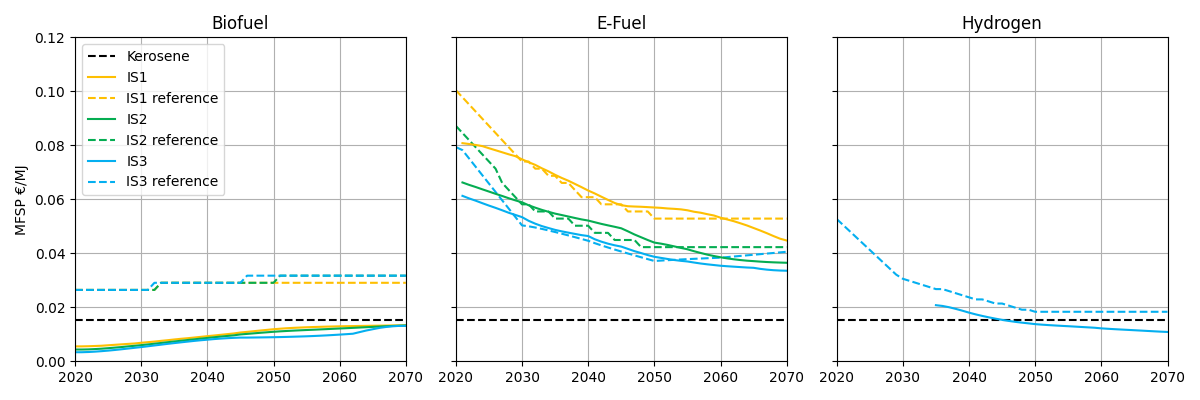

In [16]:
fig_mfsp, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

years = list(range(2020, 2071))
#
ax0.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "fossil_kerosene_mean_mfsp"],
    color="black",
    ls="--",
    label="Kerosene",
)
ax1.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "fossil_kerosene_mean_mfsp"],
    color="black",
    ls="--",
    label="Kerosene",
)
ax2.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "fossil_kerosene_mean_mfsp"],
    color="black",
    ls="--",
    label="Kerosene",
)

## BIO (FT-OTHER as Composite pathway)
ax0.plot(
    years,
    process_is1medium_data["vector_outputs"].loc[years, "generic_biofuel_mean_mfsp"],
    color="#FEBF02",
    label="IS1",
)
ax0.plot(years, is1_bio, label="IS1 reference", ls="--", color="#FEBF02")
ax0.plot(
    years,
    process_is2medium_data["vector_outputs"].loc[years, "generic_biofuel_mean_mfsp"],
    color="#05AD52",
    label="IS2",
)
ax0.plot(years, is2_bio, label="IS2 reference", ls="--", color="#05AD52")
ax0.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "generic_biofuel_mean_mfsp"],
    color="#04AFF0",
    label="IS3",
)
ax0.plot(years, is3_bio, label="IS3 reference", ls="--", color="#04AFF0")


## Efuel (CO2 indus + DAC)
ax1.plot(years, is1_efuel, label="IS1 Bio", ls="--", color="#FEBF02")
ax1.plot(years, is2_efuel, label="IS2 Bio", ls="--", color="#05AD52")
ax1.plot(years, is3_efuel, label="IS3 Bio", ls="--", color="#04AFF0")
#
ax1.plot(
    years,
    process_is1medium_data["vector_outputs"].loc[years, "electrofuel_mean_mfsp"],
    color="#FEBF02",
)
ax1.plot(
    years,
    process_is2medium_data["vector_outputs"].loc[years, "electrofuel_mean_mfsp"],
    color="#05AD52",
)
ax1.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "electrofuel_mean_mfsp"],
    color="#04AFF0",
)

## LH2

ax2.plot(years, is3_lh2, label="IS3 LH2", ls="--", color="#04AFF0")
ax2.plot(
    years,
    process_is3medium_data["vector_outputs"].loc[years, "hydrogen_electrolysis_mean_mfsp"],
    color="#04AFF0",
)

ax0.set_ylim(0, 0.12)
ax0.set_ylabel("MFSP €/MJ")

ax0.grid()
ax0.set_xlim(2020, 2070)
ax0.set_title("Biofuel")
ax1.grid()
ax1.set_xlim(2020, 2070)
ax1.set_title("E-Fuel")
ax2.grid()
ax2.set_xlim(2020, 2070)
ax2.set_title("Hydrogen")

ax0.legend(loc="upper left")

plt.tight_layout()
plt.savefig("mfsp_ltag_ref.pdf")

Comments:  
Neat reproduction of ICAO MFSP but major methodological change: everything is included in initial CAPEX, inlcuding electricity generation. It should be modified accordingly. AeroMAPS models can handle this. Potential remaining errors due to different efficiencies, but the order of magnitude is similar for each fuel. Detailled assumptions on plant life, co and by product valorisation, load factors not found or considered.  
A 6.5% private discount rate was used, combined with a 50% load factor for renewables. Despite this we are still above the ICAO values. They seem optimistic. 


### c)
Marginal abatement cost curves - comparision with reference carbon value

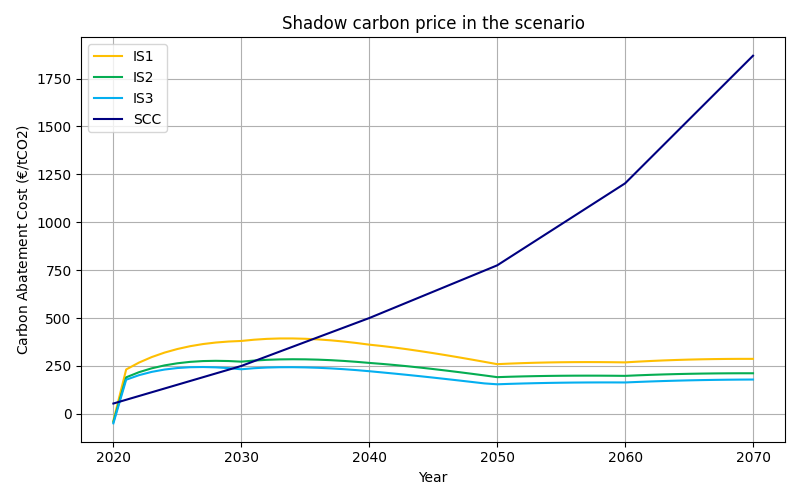

In [17]:
import pandas as pd

fig_scc, ax = plt.subplots(figsize=(8, 5))


marginal_cac_is1 = []
marginal_cac_is2 = []
marginal_cac_is3 = []

for process_data in [process_is1medium_data, process_is2medium_data, process_is3medium_data]:
    for year in range(2019, 2071):
        name = []
        vol = []
        cost = []
        spe_cost = []
        g_spe_cost = []

        colors = []

        name.extend(
            [
                el
                for el in [
                    "Passenger - Mean",
                    "Freighter - Drop in",
                    "Freighter - Hydrogen",
                    "Freighter - Electric",
                    "generic_biofuel",
                    "hydrogen_electrolysis",
                    "electrofuel",
                    "OPS",
                    "OPS - Freight",
                    "Load Factor",
                ]
            ]
        )

        # Abatement effective in MtCO2e
        vol.extend(
            [
                elt / 1000000
                for elt in [
                    process_data["vector_outputs"].aircraft_carbon_abatement_volume_passenger_mean[
                        year
                    ],
                    process_data["vector_outputs"].aircraft_carbon_abatement_volume_freight_dropin[
                        year
                    ],
                    process_data[
                        "vector_outputs"
                    ].aircraft_carbon_abatement_volume_freight_hydrogen[year],
                    process_data[
                        "vector_outputs"
                    ].aircraft_carbon_abatement_volume_freight_electric[year],
                    process_data["vector_outputs"].generic_biofuel_abatement_effective[year],
                    process_data["vector_outputs"].electrofuel_abatement_effective[year],
                    process_data["vector_outputs"].operations_abatement_effective[year],
                    process_data["vector_outputs"].operations_abatement_effective_freight[year],
                    process_data["vector_outputs"].load_factor_abatement_effective[year],
                ]
            ]
        )

        g_spe_cost.extend(
            [
                el
                for el in [
                    process_data[
                        "vector_outputs"
                    ].aircraft_generic_specific_carbon_abatement_cost_passenger_mean[year],
                    process_data[
                        "vector_outputs"
                    ].aircraft_generic_specific_carbon_abatement_cost_freight_dropin[year],
                    process_data[
                        "vector_outputs"
                    ].aircraft_generic_specific_carbon_abatement_cost_freight_hydrogen[year],
                    process_data[
                        "vector_outputs"
                    ].aircraft_generic_specific_carbon_abatement_cost_freight_electric[year],
                    process_data[
                        "vector_outputs"
                    ].generic_biofuel_generic_specific_carbon_abatement_cost[year],
                    process_data[
                        "vector_outputs"
                    ].electrofuel_generic_specific_carbon_abatement_cost[year],
                    process_data["vector_outputs"].operations_generic_specific_abatement_cost[year],
                    process_data[
                        "vector_outputs"
                    ].operations_generic_specific_abatement_cost_freight[year],
                    process_data["vector_outputs"].load_factor_generic_specific_abatement_cost[
                        year
                    ],
                ]
            ]
        )
        colors.extend(
            [
                el
                for el in [
                    "goldenrod",
                    "khaki",
                    "khaki",
                    "khaki",
                    "yellowgreen",
                    "yellowgreen",
                    "orange",
                    "orange",
                    "orange",
                ]
            ]
        )

        if "hydrogen_electrolysis_abatement_effective" in process_data["vector_outputs"].columns:
            # Abatement effective in MtCO2e
            vol.extend(
                [
                    elt / 1000000
                    for elt in [
                        process_data["vector_outputs"].hydrogen_electrolysis_abatement_effective[
                            year
                        ]
                    ]
                ]
            )

            g_spe_cost.extend(
                [
                    el
                    for el in [
                        process_data[
                            "vector_outputs"
                        ].hydrogen_electrolysis_generic_specific_carbon_abatement_cost[year],
                    ]
                ]
            )

        colors.extend(
            [
                el
                for el in [
                    "yellowgreen",
                ]
            ]
        )

        macc_df = pd.DataFrame(
            data=[vol, g_spe_cost, colors],
            columns=name,
            index=[
                "abatement_effective",
                "generic_specific_carbon_abatement_cost",
                "colors",
            ],
        )

        macc_df = macc_df.transpose()

        macc_df = macc_df.sort_values(by="generic_specific_carbon_abatement_cost")
        macc_df = macc_df.dropna(subset="generic_specific_carbon_abatement_cost")

        # Plot only made for positive abatements
        maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

        ##### POS ######

        heights_pos = maccpos_df["generic_specific_carbon_abatement_cost"].to_numpy()
        widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

        if len(widths_effective_pos > 0):
            if process_data == process_is1medium_data:
                marginal_cac_is1.append(max(heights_pos))
            elif process_data == process_is2medium_data:
                marginal_cac_is2.append(max(heights_pos))
            else:
                marginal_cac_is3.append(max(heights_pos))


years = range(2020, 2071)


ax.plot(
    years,
    marginal_cac_is1,
    color="#FEBF02",
    linestyle="-",
    label="IS1",
)


ax.plot(
    years,
    marginal_cac_is2,
    color="#05AD52",
    linestyle="-",
    label="IS2",
)

ax.plot(
    years,
    marginal_cac_is3,
    color="#04AFF0",
    linestyle="-",
    label="IS3",
)


ax.plot(
    years,
    process_is1medium_data["vector_outputs"].loc[2020:2070, "exogenous_carbon_price_trajectory"],
    color="navy",
    linestyle="-",
    label="SCC",
)


ax.set_title("Shadow carbon price in the scenario")

ax.set_ylabel("Carbon Abatement Cost (€/tCO$\mathregular{2}$)")
ax.set_xlabel("Year")

ax.grid()
ax.legend()
fig_scc.tight_layout()

Interesting to note that the most ambitious scenarios do not call for more expensive CAC options.  
Instead, they relyon on more ambitious cost and emissions assumptions, making the marginal CAC of the IS3 musch lower than that of the IS1.  
Such an consideration might be optimistic ?  
Ambitious SCC trajectory makes all trajetories socially desirable from 2030-2040 onwards.  
Analysis using MACC curve below, with a carbon abatement cost metric suited for non-regular social carbon value.

interactive(children=(IntSlider(value=2050, description='Year:', max=2070, min=2019), FloatText(value=0.0, des…

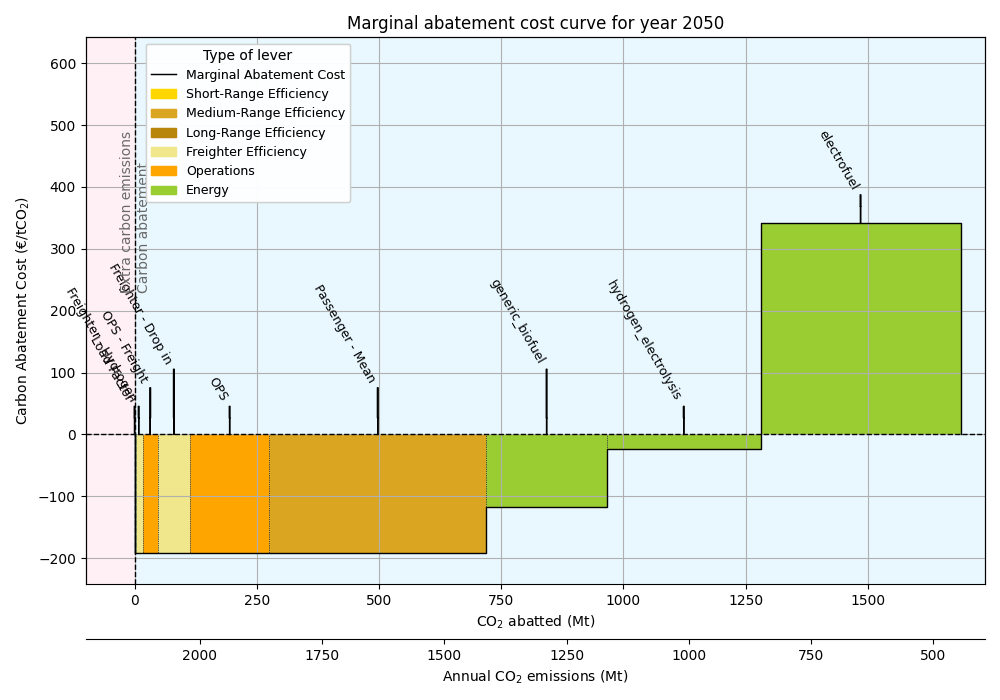

In [18]:
# process_is1medium.plot('annual_MACC_simple_fleet')
# process_is2medium.plot('annual_MACC_simple_fleet')
process_is3medium.plot("annual_MACC_simple_fleet")

__IS1__: Until 2040 E-fuel CAC is too high to be socially desirable. All others are desirable.  
__IS2__: Until 2033 E-fuel CAC is too high to be socially desirable. All others are desirable.  
__IS1__: Until 2030 E-fuel CAC is too high to be socially desirable. All others are desirable, including electrolysis H2 when introduced. 

### d)  
Now let's imagine a worldwide carbon tax is implemented according to the social value trajectory considered here. 
This carbon tax does not necessarily ensure that socially desirable fuels are at anytime cheaper than the fossil kerosene, including the carbon tax. Indeed, the specific carbon abatement cost ensures that, over the lifetime of a fuel production plant and given the trajectory of carbon price, the net present value of the plnats equals 0. Thus, the fuel produced over the lifetime of the plant is indeed cheaper than fossil kerosene avoided, carbon tax considered.  
But that view is efficient only with a social planner or pulic perspective.   
From a private airline perspective, at the begining, SAFs will still be more expensive than fossil kerosene. The instantaneous carbon abatement cost metric does exactly this. 

interactive(children=(ToggleButtons(description='Visualisation mode:', options=(('All pathways - 1 year', 'per…

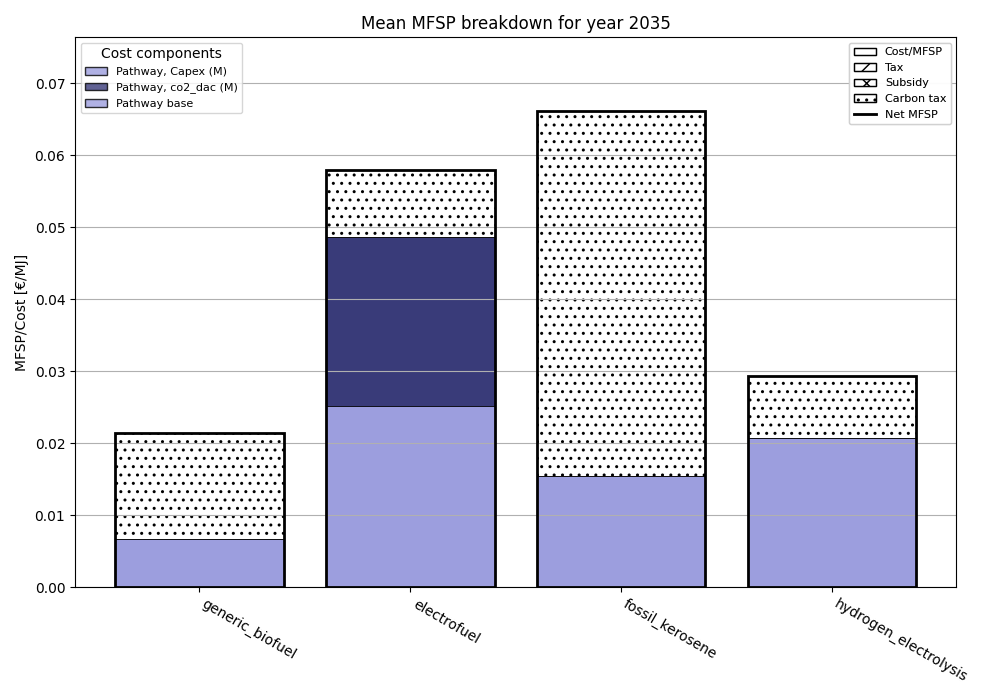

In [19]:
process_is3medium.plot("mfsp_detailled")

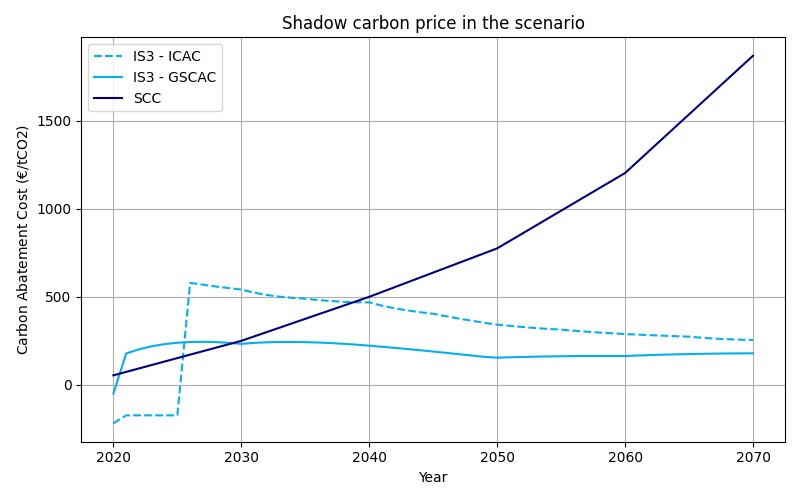

In [20]:
import pandas as pd

fig_scc, ax = plt.subplots(figsize=(8, 5))


marginal_cac_instant_is3 = []


for year in range(2019, 2071):
    name = []
    vol = []
    cost = []
    spe_cost = []
    g_spe_cost = []

    colors = []

    name.extend(
        [
            el
            for el in [
                "Passenger - Mean",
                "Freighter - Drop in",
                "Freighter - Hydrogen",
                "Freighter - Electric",
                "generic_biofuel",
                "hydrogen_electrolysis",
                "electrofuel",
                "OPS",
                "OPS - Freight",
                "Load Factor",
            ]
        ]
    )

    # Abatement effective in MtCO2e
    vol.extend(
        [
            elt / 1000000
            for elt in [
                process_data["vector_outputs"].aircraft_carbon_abatement_volume_passenger_mean[
                    year
                ],
                process_data["vector_outputs"].aircraft_carbon_abatement_volume_freight_dropin[
                    year
                ],
                process_data["vector_outputs"].aircraft_carbon_abatement_volume_freight_hydrogen[
                    year
                ],
                process_data["vector_outputs"].aircraft_carbon_abatement_volume_freight_electric[
                    year
                ],
                process_data["vector_outputs"].generic_biofuel_abatement_effective[year],
                process_data["vector_outputs"].electrofuel_abatement_effective[year],
                process_data["vector_outputs"].operations_abatement_effective[year],
                process_data["vector_outputs"].operations_abatement_effective_freight[year],
                process_data["vector_outputs"].load_factor_abatement_effective[year],
            ]
        ]
    )

    g_spe_cost.extend(
        [
            el
            for el in [
                process_data["vector_outputs"].aircraft_carbon_abatement_cost_passenger_mean[year],
                process_data["vector_outputs"].aircraft_carbon_abatement_cost_freight_dropin[year],
                process_data["vector_outputs"].aircraft_carbon_abatement_cost_freight_hydrogen[
                    year
                ],
                process_data["vector_outputs"].aircraft_carbon_abatement_cost_freight_electric[
                    year
                ],
                process_data["vector_outputs"].generic_biofuel_carbon_abatement_cost[year],
                process_data["vector_outputs"].hydrogen_electrolysis_carbon_abatement_cost[year],
                process_data["vector_outputs"].electrofuel_carbon_abatement_cost[year],
                process_data["vector_outputs"].operations_abatement_cost[year],
                process_data["vector_outputs"].operations_abatement_cost_freight[year],
                process_data["vector_outputs"].load_factor_abatement_cost[year],
            ]
        ]
    )

    colors.extend(
        [
            el
            for el in [
                "goldenrod",
                "khaki",
                "khaki",
                "khaki",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "orange",
                "orange",
                "orange",
            ]
        ]
    )

    macc_df = pd.DataFrame(
        data=[vol, g_spe_cost, colors],
        columns=name,
        index=[
            "abatement_effective",
            "carbon_abatement_cost",
            "colors",
        ],
    )

    macc_df = macc_df.transpose()

    macc_df = macc_df.sort_values(by="carbon_abatement_cost")
    macc_df = macc_df.dropna(subset="carbon_abatement_cost")

    # Plot only made for positive abatements
    maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

    ##### POS ######

    heights_pos = maccpos_df["carbon_abatement_cost"].to_numpy()
    widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

    if len(widths_effective_pos > 0):
        marginal_cac_instant_is3.append(max(heights_pos))


years = range(2020, 2071)


ax.plot(
    years,
    marginal_cac_instant_is3,
    color="#04AFF0",
    linestyle="--",
    label="IS3 - ICAC",
)

years = range(2020, 2071)


ax.plot(
    years,
    marginal_cac_is3,
    color="#04AFF0",
    linestyle="-",
    label="IS3 - GSCAC",
)


ax.plot(
    years,
    process_is1medium_data["vector_outputs"].loc[2020:2070, "exogenous_carbon_price_trajectory"],
    color="navy",
    linestyle="-",
    label="SCC",
)


ax.set_title("Shadow carbon price in the scenario")
ax.set_ylabel("Carbon Abatement Cost (€/tCO$\mathregular{2}$)")
ax.set_xlabel("Year")

ax.grid()
ax.legend()
fig_scc.tight_layout()

In [21]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())